# Final Project
## Tyler Baker and Rathish Parayil Sasidharan

Your project should incorporate one or both of the two main themes of this course: network analysis and text processing. You need to show all of your work in a coherent workflow, and in a reproducible format, such as an IPython Notebook or an R Markdown document. If you are building a model or models, explain how you evaluate the “goodness” of the chosen model and parameters.

## Introduction


### Setting the Environment

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import nltk
import random
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import re
import string
import math
import collections

### The Data
We got our data from <a href="https://www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset?resource=download">Kaggle</a>.

In [5]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/tylerbaker01/Data-620/main/yelp.csv")

### Part 1 SNA

## Part 2 - NLP
### Analyze Review Data
Our goal here is to analyze the review data.
#### Handling the Data

In [101]:
data_text = data_raw[["stars","text"]]

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [104]:
# First we will remove contractions.
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

data_text['text']=data_text['text'].apply(lambda x:expand_contractions(x))

C:\Users\tyler\AppData\Local\Temp/ipykernel_2352/1346431695.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['text']=data_text['text'].apply(lambda x:expand_contractions(x))


In [105]:
# Now we will turn every word into lowercase.
data_text['text']=data_text['text'].apply(lambda x: x.lower())

C:\Users\tyler\AppData\Local\Temp/ipykernel_2352/4101854238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['text']=data_text['text'].apply(lambda x: x.lower())


In [106]:
# Now we will remove punctuations.
data_text['text']=data_text['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

C:\Users\tyler\AppData\Local\Temp/ipykernel_2352/3905788461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['text']=data_text['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [107]:
# Finally, we will remove numerals.
data_text['text']=data_text['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

C:\Users\tyler\AppData\Local\Temp/ipykernel_2352/1490936255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['text']=data_text['text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [108]:
text = data_text[['text']].values.tolist()

In [109]:
# flatten text
f_text = []
for i in text:
    for j in i:
        f_text.append(j)

In [110]:
ft = ' '.join(f_text)

In [111]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [112]:
# Make a list of all of the words
words = word_tokenize(ft)

In [113]:
words[0:10]

['my',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast']

Next we will remove stop words.

In [114]:
from nltk.corpus import stopwords

In [115]:
stop_words = set(stopwords.words('english'))

In [116]:
filtered_list = []

# store all of the non stop words.
for word in words:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

In [117]:
filtered_list[0:10]

['wife',
 'took',
 'birthday',
 'breakfast',
 'excellent',
 'weather',
 'perfect',
 'made',
 'sitting',
 'outside']

Now we will remove these words to their root words.

In [118]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [119]:
lemmas = []
for w in filtered_list:
    lemmas.append(lemmatizer.lemmatize(w))

In [120]:
lemmas[0:10]

['wife',
 'took',
 'birthday',
 'breakfast',
 'excellent',
 'weather',
 'perfect',
 'made',
 'sitting',
 'outside']

#### Analyzing
Now that we have broken our original text down to the lemmas, we are ready to do some analysis.

In [121]:
# Tokens
from nltk import FreqDist
freq = FreqDist(lemmas)

In [122]:
freq.most_common(20)

[('place', 7370),
 ('good', 6768),
 ('food', 6261),
 ('great', 5067),
 ('like', 5039),
 ('time', 4534),
 ('would', 4288),
 ('one', 4267),
 ('get', 4118),
 ('go', 3620),
 ('really', 3348),
 ('service', 3180),
 ('back', 2866),
 ('also', 2507),
 ('love', 2355),
 ('little', 2216),
 ('nice', 2207),
 ('restaurant', 2177),
 ('well', 2103),
 ('make', 2017)]

In [123]:
# Bigrams
bigrams = nltk.bigrams(lemmas)
bigram_freq = FreqDist(bigrams)

In [124]:
# Trigrams
trigrams = nltk.trigrams(lemmas)
trigram_freq = FreqDist(trigrams)

#### Visualizations

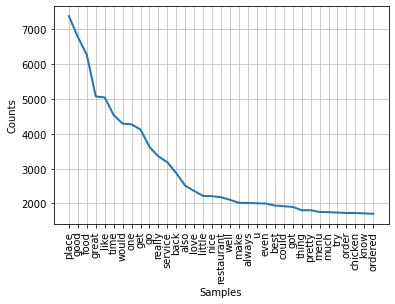

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [125]:
# Tokens frequency plot
freq.plot(35)

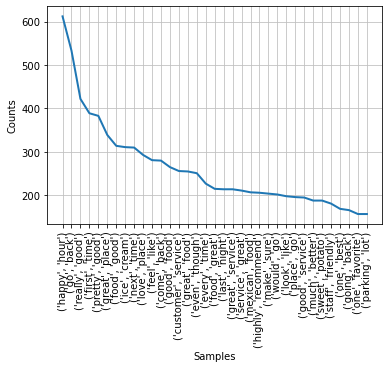

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [126]:
# Bigrams frequency plot
bigram_freq.plot(35)

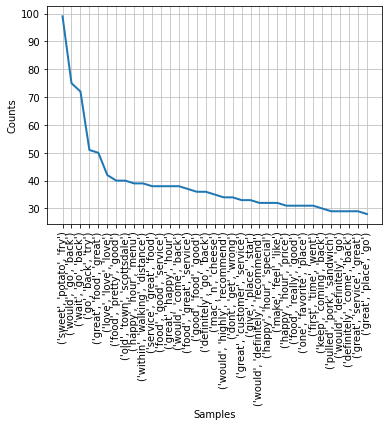

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [127]:
# Trigrams frequency plot
trigram_freq.plot(35)

### Rating Prediction
The goal here is to take the review data and split it into a training set and a test set. Then we train the training set until we can attempt to predict the test set. We want each review to be either rated as: 1, 2, 3, 4, or 5.

We will make three sets. A test_set of 1000 reviews, a dev_test set of 1000 reviews, and a train_set of 8000 reviews.

#### The Data
We will use the data from the beginning but we only need the reviews and the score.

In [132]:
data_text = data_text[["text", "stars"]]

In [133]:
dt_list = data_text.values.tolist()

#### Creating the Simulation
This will be done very much like project 3.

In [134]:
def accuracy(number_of_runs, function):
    accuracy_df = {
        "classifier": [],
        "train_set_acc": [],
        "dev_set_acc": [],
        "test_acc": []
    }
    for i in range(number_of_runs):
        random.shuffle(dt_list)
        dev_name_set = dt_list[0:1000]
        test_name_set = dt_list[1000:2000]
        train_name_set = dt_list[2000:]
        dev_set = [(function(n), i) for (n, i) in dev_name_set]
        test_set = [(function(n), i) for (n, i) in test_name_set]
        train_set = [(function(n), i) for (n, i) in train_name_set]
        classifier = nltk.NaiveBayesClassifier.train(train_set)
        accuracy_df["classifier"].append(classifier)
        accuracy_df["train_set_acc"].append(nltk.classify.accuracy(classifier, train_set))
        accuracy_df["dev_set_acc"].append(nltk.classify.accuracy(classifier, dev_set))
        accuracy_df["test_acc"].append(nltk.classify.accuracy(classifier, test_set))
    accuracy_df = pd.DataFrame.from_dict(accuracy_df)
    return(accuracy_df)

#### Creating Features
Now we can create features which classify the text based on certain conditions.

In [135]:
# Length of Review. Total characters.
def length_of_review(text):
    return {"length": len(text)}

In [136]:
char_amount_df = accuracy(100, length_of_review)

In [137]:
char_amount_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.541526,0.342590,0.341830
std,0.001889,0.011909,0.013694
min,0.537000,0.312000,0.297000
25%,0.540250,0.334750,0.333000
50%,0.541562,0.343000,0.343500
75%,0.543031,0.349000,0.352000
max,0.545000,0.375000,0.373000


In [138]:
# The amount of words in a review.
def words_in_review(text):
    return {"length": len(text.split())}

In [139]:
word_amount_df = accuracy(100, words_in_review)

In [140]:
word_amount_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.433464,0.349850,0.353760
std,0.002358,0.015064,0.013039
min,0.426625,0.319000,0.321000
25%,0.431969,0.341000,0.345000
50%,0.433688,0.350000,0.355000
75%,0.435000,0.358500,0.361000
max,0.439250,0.395000,0.390000


In [141]:
# If the letters "b" and "g" are in the review.
def b_n_g(review):
    return {"b_and_g": bool(re.match('^[bg]+$', review))}

In [142]:
b_n_g_df = accuracy(100, b_n_g)

In [143]:
b_n_g_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.352759,0.352980,0.350950
std,0.002160,0.013949,0.014104
min,0.346500,0.317000,0.312000
25%,0.351375,0.343750,0.340750
50%,0.352375,0.355500,0.352000
75%,0.354156,0.362250,0.360000
max,0.358250,0.382000,0.387000


In [144]:
# Amount of words and amount of characters
def amounts(review):
    return {"char_len": len(review), "word_amount": len(review.split())}

In [145]:
amounts_df = accuracy(100, amounts)

In [146]:
amounts_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.00000
mean,0.575645,0.324300,0.32426
std,0.002814,0.011057,0.01430
min,0.568875,0.300000,0.28300
25%,0.573937,0.317000,0.31700
50%,0.575937,0.323000,0.32450
75%,0.577375,0.331250,0.33200
max,0.582000,0.349000,0.37000


So clearly the features we have tried have not worked well. Our next attempt is to make a list of positive words and a list of negative words to use as features.

In [147]:
positive_words = ["good", "positive", "excellent", "fun", "awesome", "delicious", "wow", "affordable", "clean", "quick"]
negative_words = ["bad", "loud", "dirty", "dark", "gross", "expensive", "slow", "rude", "negative", "crowded"]

In [148]:
# Positive_words
def p_words(review):
    words = review.split()
    return {"matches": any(i in words for i in positive_words)}

In [149]:
positive_df = accuracy(100, p_words)

In [150]:
positive_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.379602,0.377040,0.380140
std,0.002221,0.012345,0.012879
min,0.374250,0.346000,0.351000
25%,0.378125,0.369750,0.371750
50%,0.379750,0.378000,0.379500
75%,0.381031,0.386000,0.389000
max,0.384500,0.403000,0.409000


In [151]:
# Negative_words
def neg_words(review):
    words = review.split()
    return {"matches": any(i in words for i in negative_words)}

In [152]:
neg_df = accuracy(100, neg_words)

In [153]:
neg_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.360637,0.361850,0.359050
std,0.002335,0.013007,0.013879
min,0.355375,0.329000,0.324000
25%,0.358875,0.354500,0.349000
50%,0.360687,0.363000,0.361000
75%,0.362406,0.370000,0.368000
max,0.366375,0.397000,0.390000


So that did no help much either. Let's see what happens if we combine them.

In [154]:
def common_words(review):
    words = review.split()
    return {"matches": any(i in words for i in (negative_words + positive_words))}

In [155]:
com_df = accuracy(100, common_words)

In [156]:
com_df.describe()

,train_set_acc,dev_set_acc,test_acc
count,100.000000,100.000000,100.000000
mean,0.381770,0.379440,0.384400
std,0.002613,0.015692,0.015022
min,0.373000,0.331000,0.343000
25%,0.380250,0.369000,0.376000
50%,0.381812,0.379500,0.386000
75%,0.383531,0.390250,0.393250
max,0.387500,0.418000,0.433000


#### Conclusions for the prediction model
That was hard, and surprising. The models that used review lengths as their features performed better than those that were matched to other lists. I imagine if we had a bigger list of the most commonly used positive and negative words are model would score much higher.